# The data lung cancer set:
- A description can be found <a href="https://stat.ethz.ch/R-manual/R-devel/library/survival/html/lung.html"> here</a>.

- To load it into R, use:

In [1]:
data(cancer, package="survival")
head(lung) # lung is the variable we will always use for data

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


## Obtain summary statistics:

In [2]:
summary(lung)

      inst            time            status           age       
 Min.   : 1.00   Min.   :   5.0   Min.   :1.000   Min.   :39.00  
 1st Qu.: 3.00   1st Qu.: 166.8   1st Qu.:1.000   1st Qu.:56.00  
 Median :11.00   Median : 255.5   Median :2.000   Median :63.00  
 Mean   :11.09   Mean   : 305.2   Mean   :1.724   Mean   :62.45  
 3rd Qu.:16.00   3rd Qu.: 396.5   3rd Qu.:2.000   3rd Qu.:69.00  
 Max.   :33.00   Max.   :1022.0   Max.   :2.000   Max.   :82.00  
 NA's   :1                                                       
      sex           ph.ecog          ph.karno        pat.karno     
 Min.   :1.000   Min.   :0.0000   Min.   : 50.00   Min.   : 30.00  
 1st Qu.:1.000   1st Qu.:0.0000   1st Qu.: 75.00   1st Qu.: 70.00  
 Median :1.000   Median :1.0000   Median : 80.00   Median : 80.00  
 Mean   :1.395   Mean   :0.9515   Mean   : 81.94   Mean   : 79.96  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.: 90.00   3rd Qu.: 90.00  
 Max.   :2.000   Max.   :3.0000   Max.   :100.00   Max.   :100.0

## Add two new columns to present status and sex as categorical columns:

In [3]:
# convert status to categorical
lung <- within(lung, { 
    status.category <- NA; #initialize a new column
    status.category[status==1] <- "censored" 
    status.category[status==2] <- "dead" 
    } 
)

# sex status to categorical
lung <- within(lung, { 
    sex.category <- NA 
    sex.category[sex==1] <- "Male" 
    sex.category[sex==2] <- "Female" 
    } 
)

# take a look!
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status.category,sex.category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,3,306,2,74,1,1,90,100,1175,NA,dead,Male
2,3,455,2,68,1,0,90,90,1225,15,dead,Male
3,3,1010,1,56,1,0,90,90,NA,15,censored,Male
4,5,210,2,57,1,1,90,60,1150,11,dead,Male
5,1,883,2,60,1,0,100,90,NA,0,dead,Male
6,12,1022,1,74,1,1,50,80,513,0,censored,Male


# Univariant visualization: frequency by bar plots

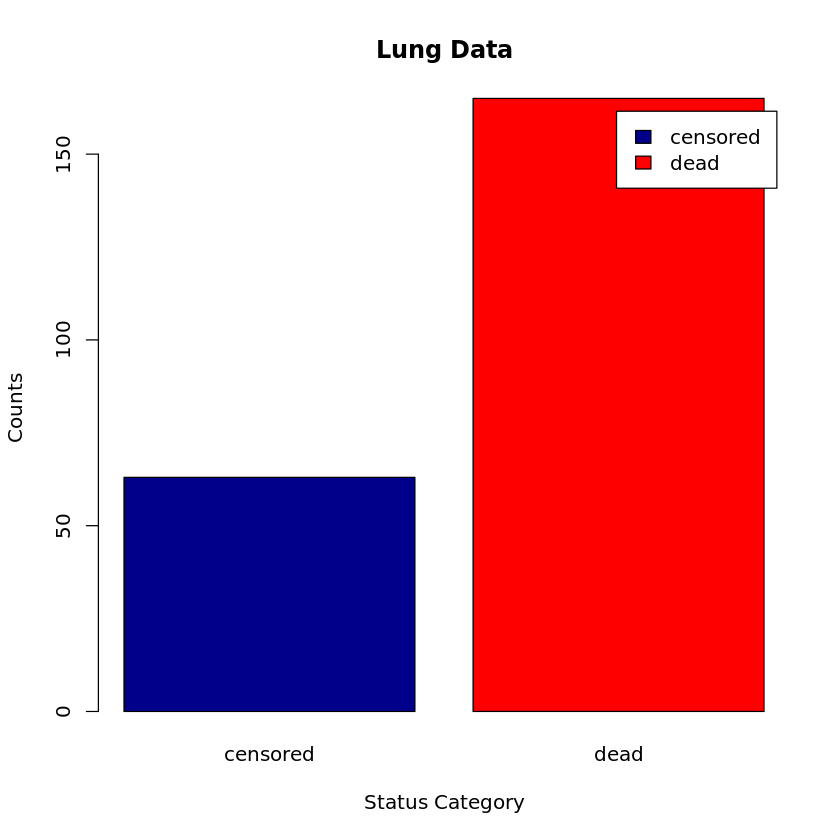

In [4]:
# obtain freuencies
counts <- table(lung$status.category)

#plot the bar plots and label them
barplot(counts, main="Lung Data", 
        xlab="Status Category", ylab="Counts",
        col=c("darkblue","red"), legend = rownames(counts))


# Univariate visualization: pie charts

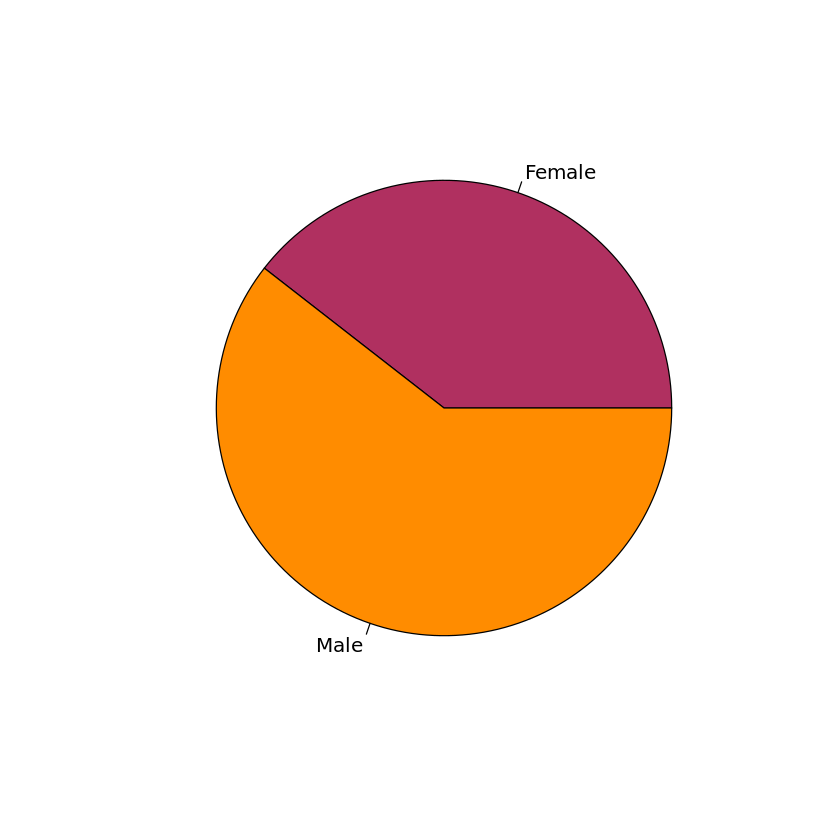

In [5]:
# tabulate the frquencies
mytable <- table(lung$sex.category)

# plot the pie chart with colours
pie(mytable, col=c("maroon","darkorange"))

# Univariant visualization: frequency by Treemap

In [6]:
# install and load treemap pakacge
# install.packages("treemap")

Installing package into ‘/home/jupyter-juli/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridBase’, ‘igraph’




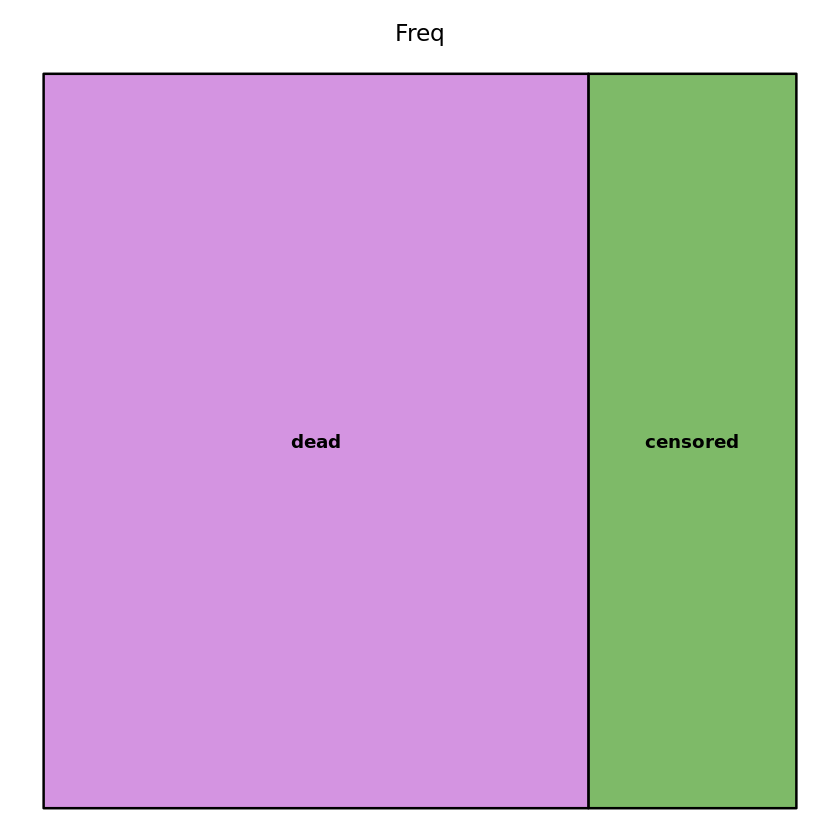

In [7]:
# tabulate the frquencies
mytable <- data.frame(table(lung$status.category))

# plot the simple treemap
treemap::treemap(mytable, index =c("Var1"), vSize = "Freq")


# Univariate visualization: histograms - balanced vs skewed distributions

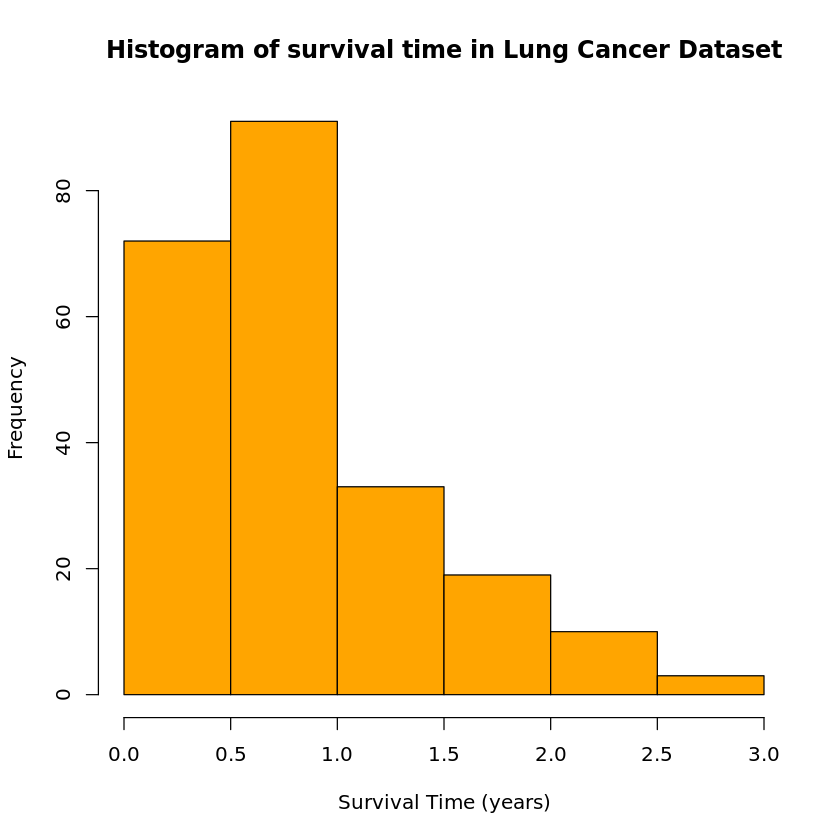

In [9]:
hist(lung$time/365, breaks=6, col="orange", 
     main="Histogram of survival time in Lung Cancer Dataset", 
     xlab="Survival Time (years)")


- And if we change the number of breaks, we get more bins:

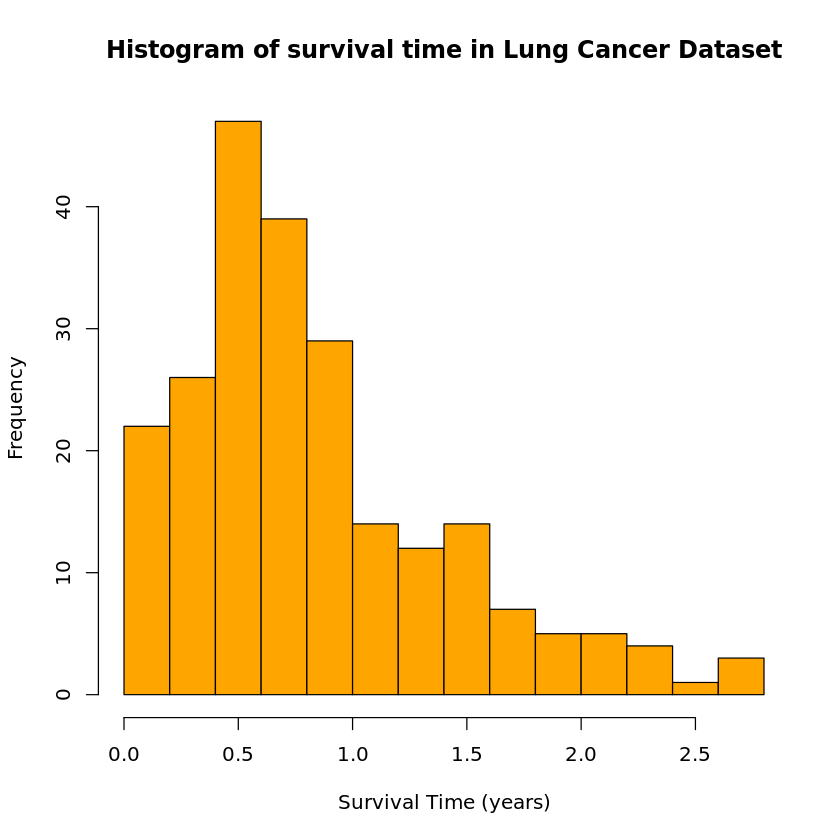

In [10]:
hist(lung$time/365, breaks=10, col="orange", 
     main="Histogram of survival time in Lung Cancer Dataset", 
     xlab="Survival Time (years)")

# Univariate visualization: box plots

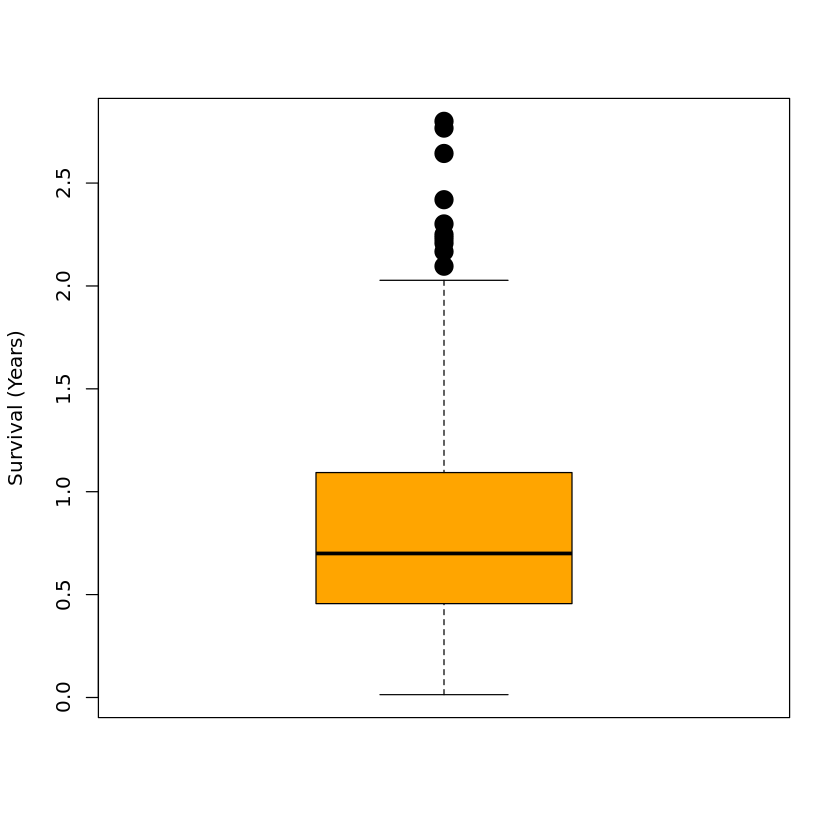

In [11]:
boxplot(lung$time/365, ylab="Survival (Years)", col="orange", pch=19, cex=2)

# Univariate visualization: kernel density functions

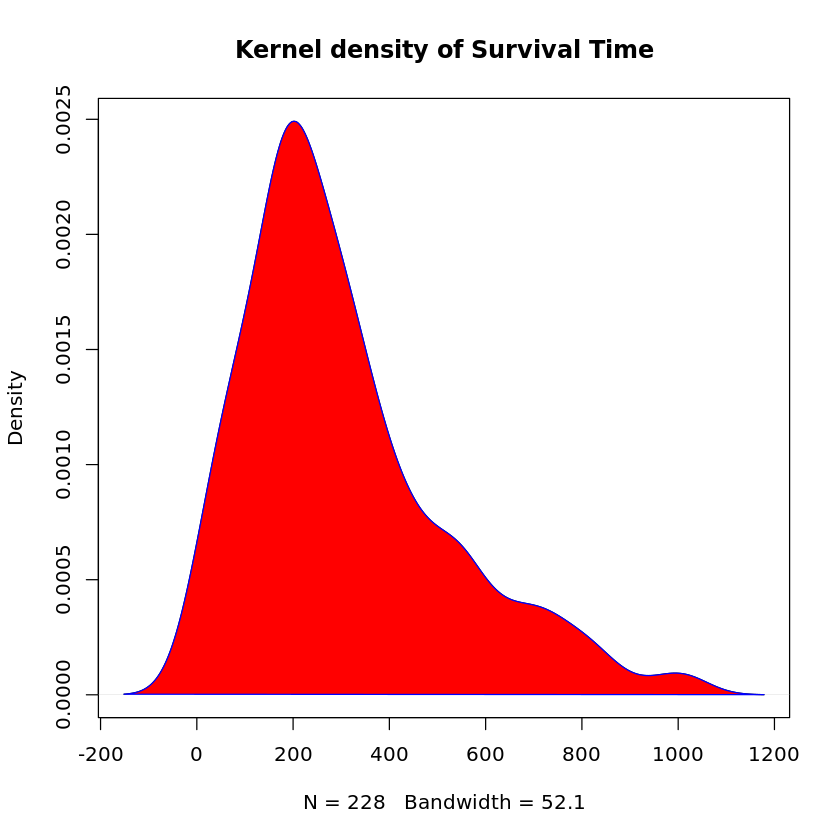

In [12]:
d <- density(lung$time)
plot(d, main="Kernel density of Survival Time")
polygon(d, col="red", border="blue")

In [14]:
install.packages("vioplot")


Installing package into ‘/home/jupyter-juli/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependency ‘sm’




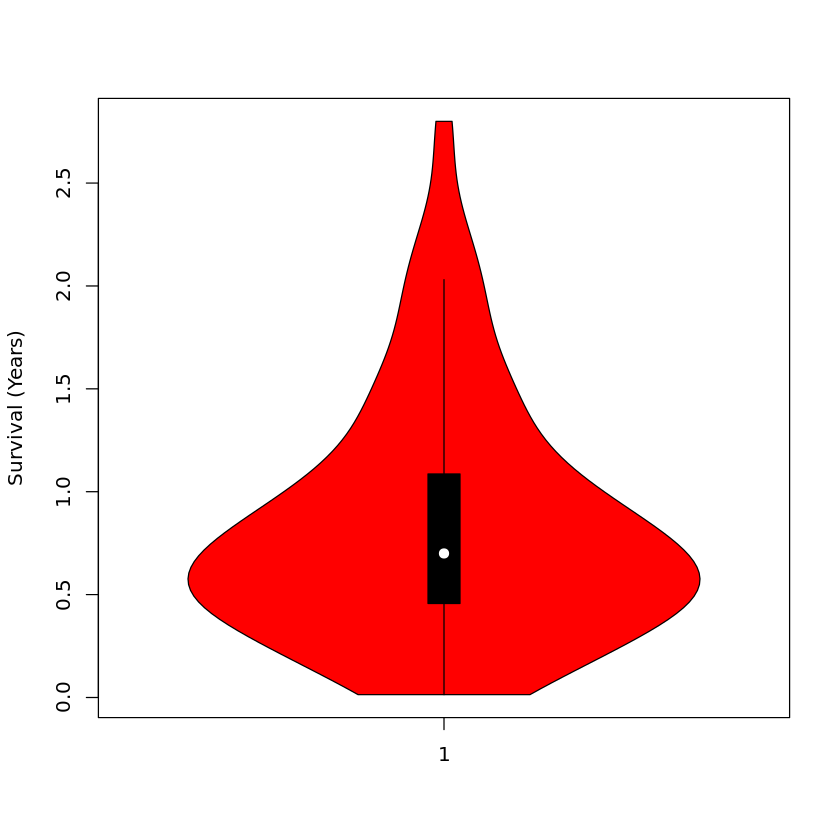

In [15]:
vioplot::vioplot(lung$time/365, ylab="Survival (Years)", col="red")


# Univariate visualizations: dot plots

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status.category,sex.category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
57,5,5,2,65,2,0,100,80,338,5,dead,Female
73,5,11,2,74,1,2,70,100,1175,0,dead,Male
79,3,11,2,81,1,0,90,NA,731,15,dead,Male
108,1,11,2,67,1,1,90,90,925,NA,dead,Male
30,1,12,2,74,1,2,70,50,305,20,dead,Male
116,1,13,2,76,1,2,70,70,413,20,dead,Male


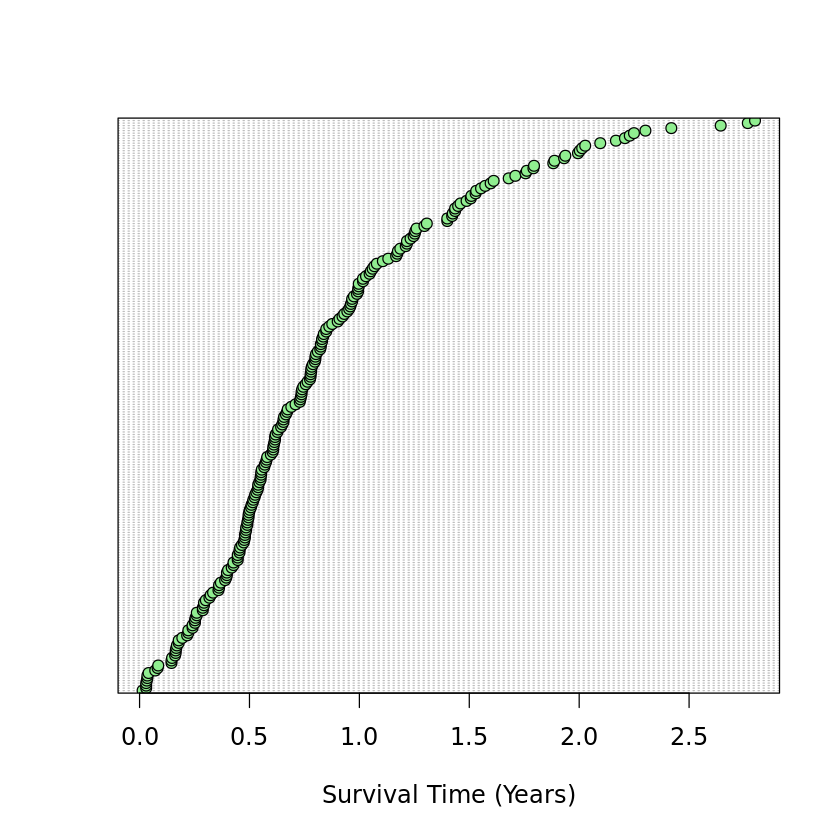

In [16]:
tmpData <- lung[order(lung$time), ]
dotchart(tmpData$time/365, label=NULL, cex=1.2, pch=21, bg="lightgreen", xlab="Survival Time (Years)")
head(tmpData)

# Bivariate visualization: frequency per group (stacked vs groups)

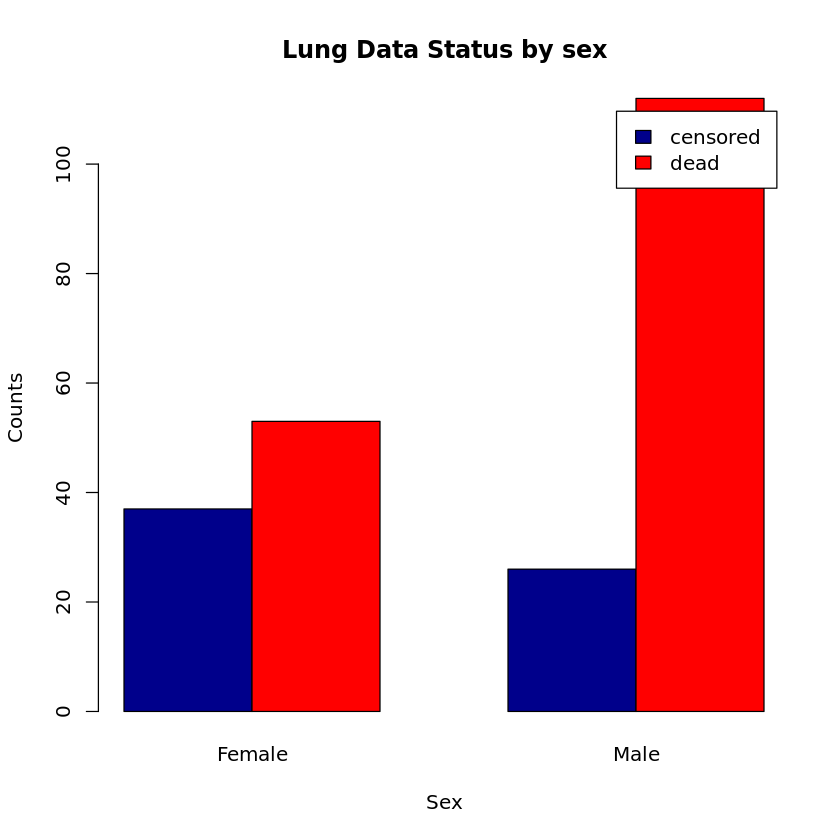

In [17]:
counts <- table(lung$status.category, lung$sex.category)
barplot(counts, main="Lung Data Status by sex", xlab="Sex", ylab="Counts", col=c("darkblue","red"), 
        legend = rownames(counts), beside=TRUE)

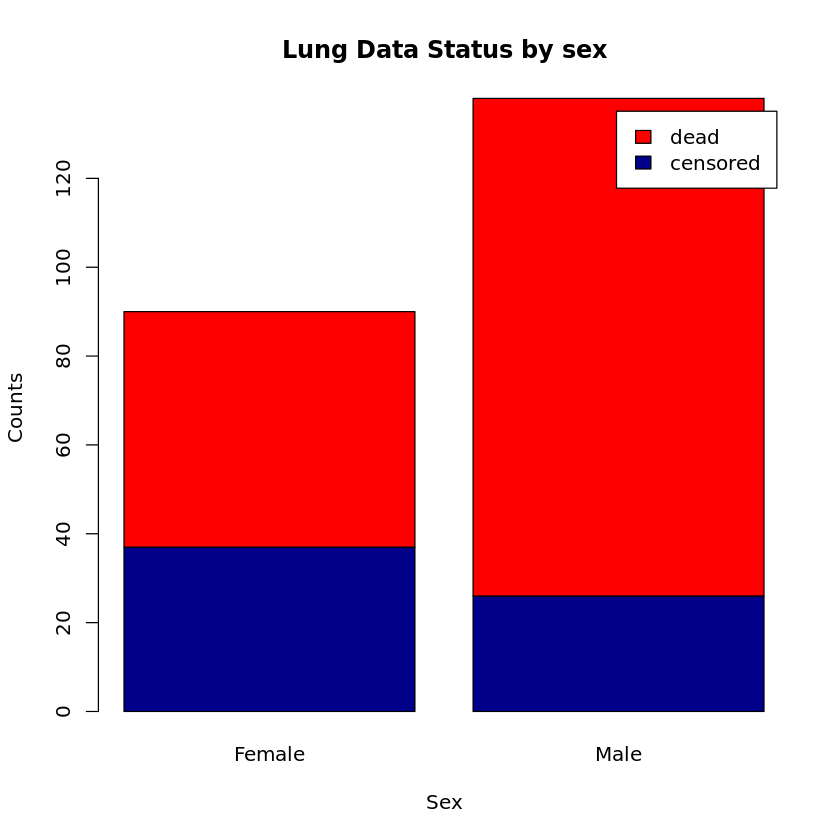

In [18]:
counts <- table(lung$status.category, lung$sex.category)
barplot(counts, main="Lung Data Status by sex", xlab="Sex", ylab="Counts", col=c("darkblue","red"), 
        legend = rownames(counts), beside=FALSE)

# Bivariate visualization: scatter plots

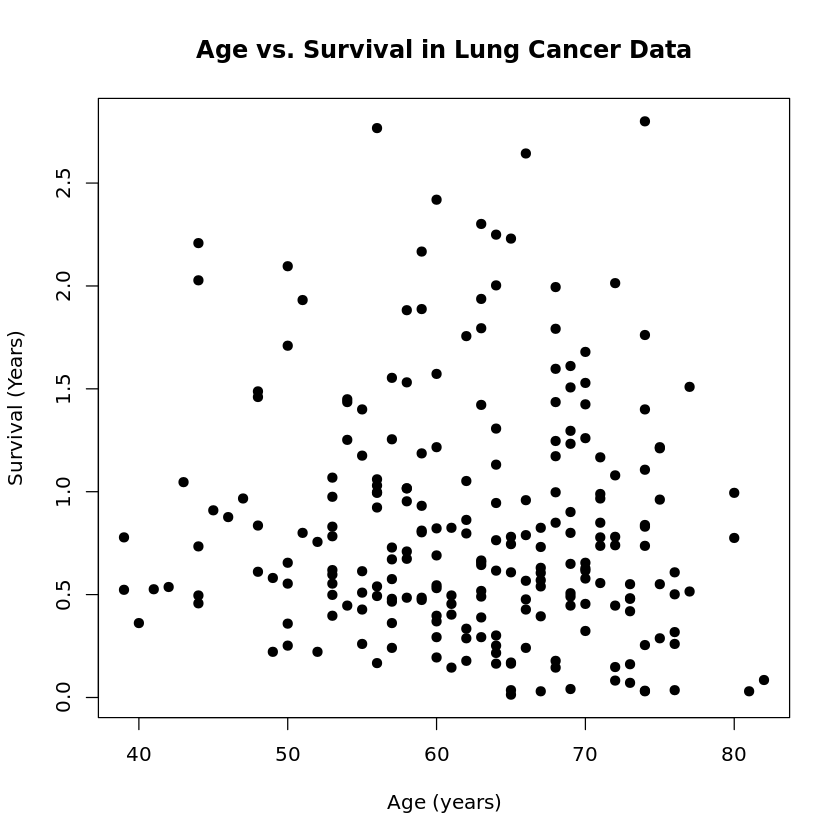

In [19]:
plot(lung$age, lung$time/365, pch=19, main="Age vs. Survival in Lung Cancer Data", 
     xlab="Age (years)", ylab="Survival (Years)")


## Retrieve the extreme points:

In [20]:
lung[lung$time > 100 & lung$age < 40,]


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status.category,sex.category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
182,1,284,1,39,1,0,100,90,1225,-5,censored,Male
225,13,191,1,39,1,0,90,90,2350,-5,censored,Male


In [21]:
lung[lung$time > 100 & lung$age >= 80,]

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status.category,sex.category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
113,10,283,2,80,1,1,80,100,1030,6,dead,Male
120,15,363,2,80,1,1,80,90,346,11,dead,Male


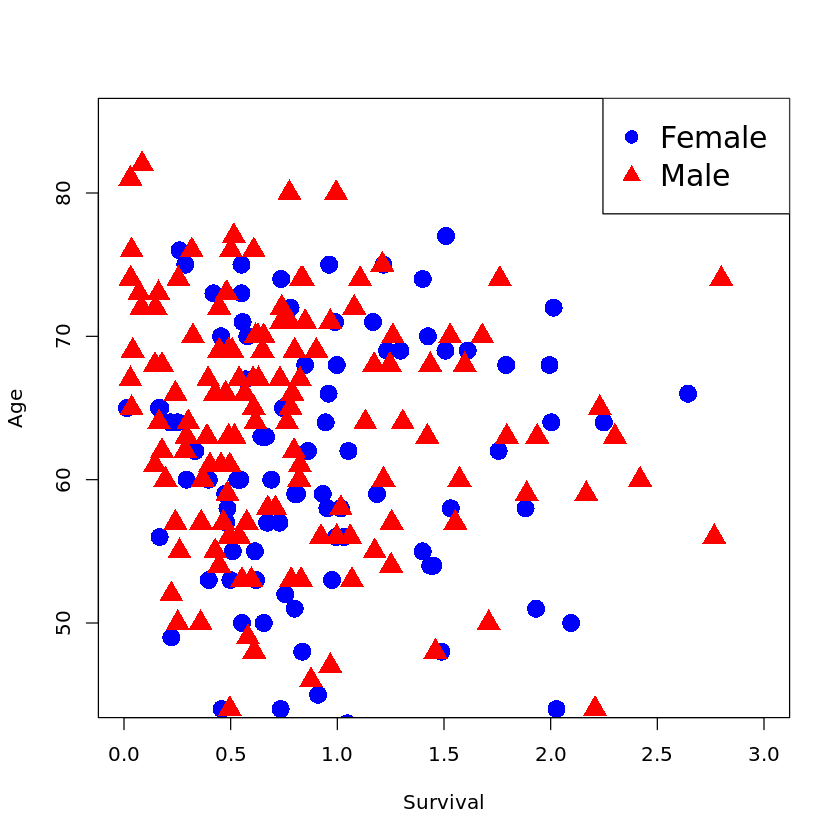

In [22]:
# plot the first group
plot(lung[lung$sex.category == "Female", ]$time/365, xlim=c(0,3), ylim=c(45,85), 
     lung[lung$sex.category == "Female", ]$age, pch=16, cex=2, col="blue", ylab="Age", xlab="Survival")

# add the second group
points(lung[lung$sex.category == "Male", ]$time/365, lung[lung$sex.category == "Male", ]$age, pch=17, col="red", cex=2)

# add a legend
legend("topright",c("Female", "Male"), col=c("blue","red"),pch=c(16,17), cex=1.5)

# Bivariate visualization: best fit line

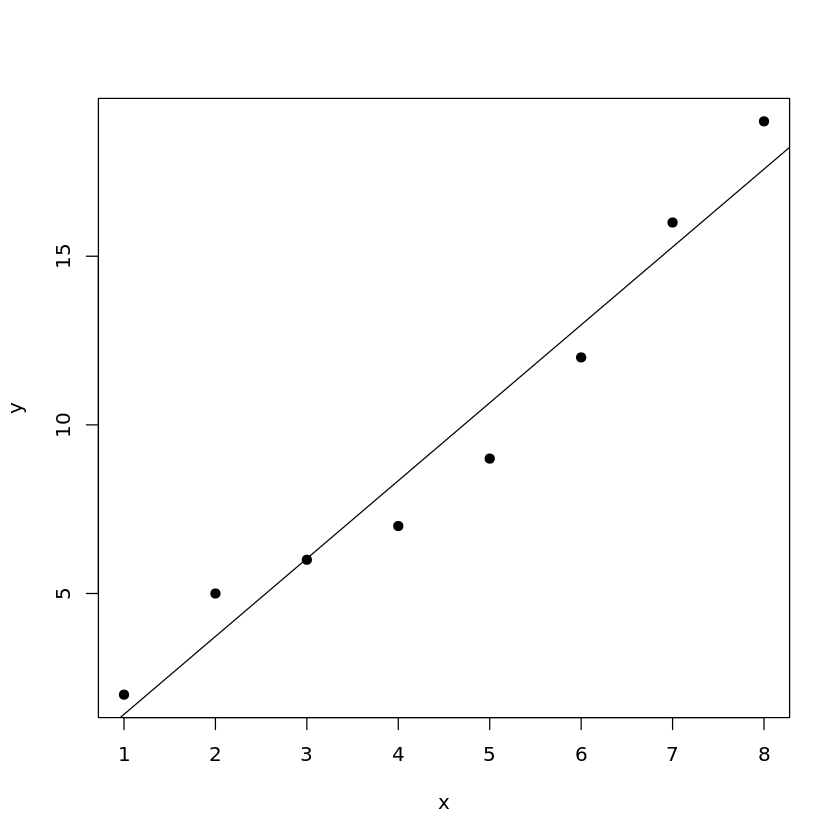

In [23]:
# makeup data 
x <- c(1, 2, 3, 4, 5, 6, 7, 8) 
y <- c(2, 5, 6, 7, 9, 12, 16, 19) 

#create scatter plot of x vs. y 
plot(x, y, pch=19) 

#add line of best fit to scatter plot 
abline(lm(y ~ x))

# Bivariate visualization: boxplots

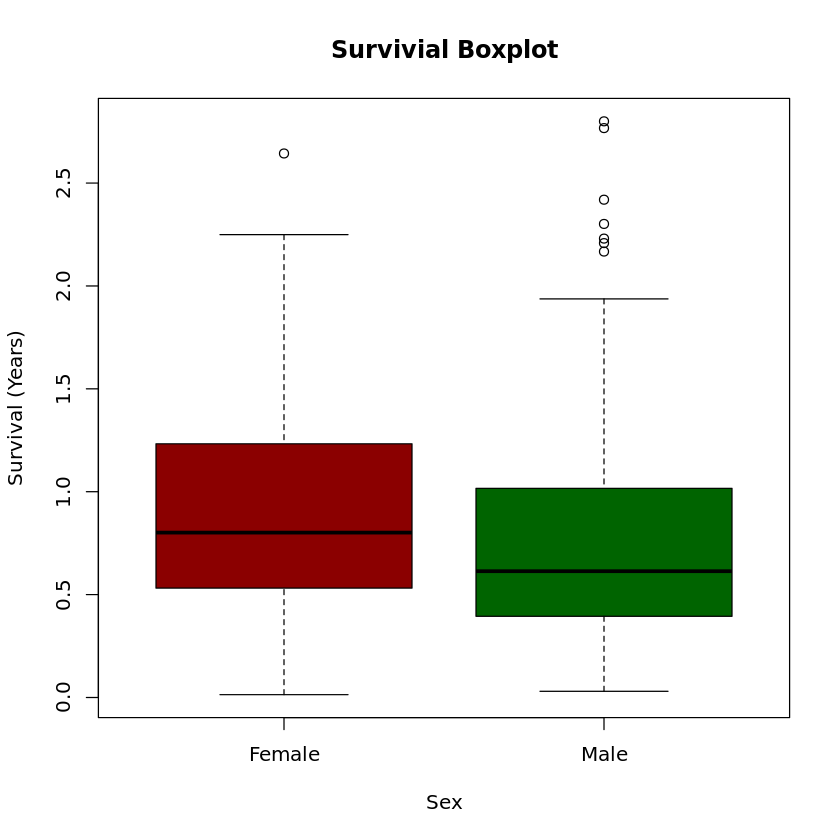

In [24]:
boxplot(lung$time/365 ~ lung$sex.category, col=c("darkred", "darkgreen"), 
        main="Survivial Boxplot", xlab="Sex", ylab="Survival (Years)")


# Bivariate visualization: kernel density plots

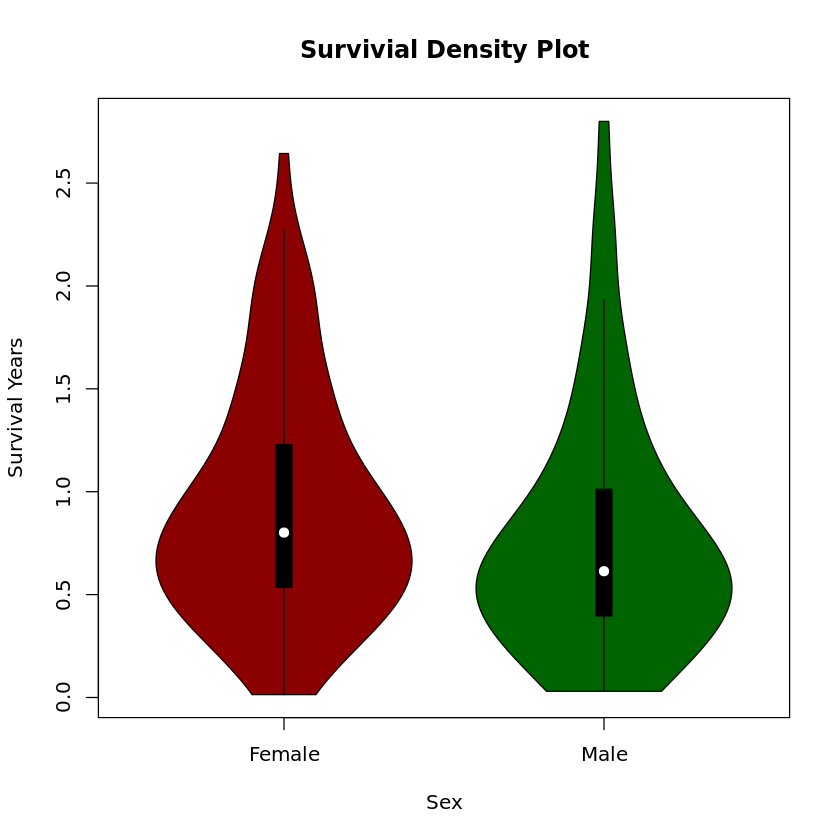

In [25]:

vioplot::vioplot(lung$time/365 ~ lung$sex.category, 
        col=c("darkred", "darkgreen"), 
        main="Survivial Density Plot", 
        xlab="Sex", 
        ylab="Survival Years")


# Outliers?

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status.category,sex.category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
38,15,965,1,66,2,1,70,90,875,4,censored,Female


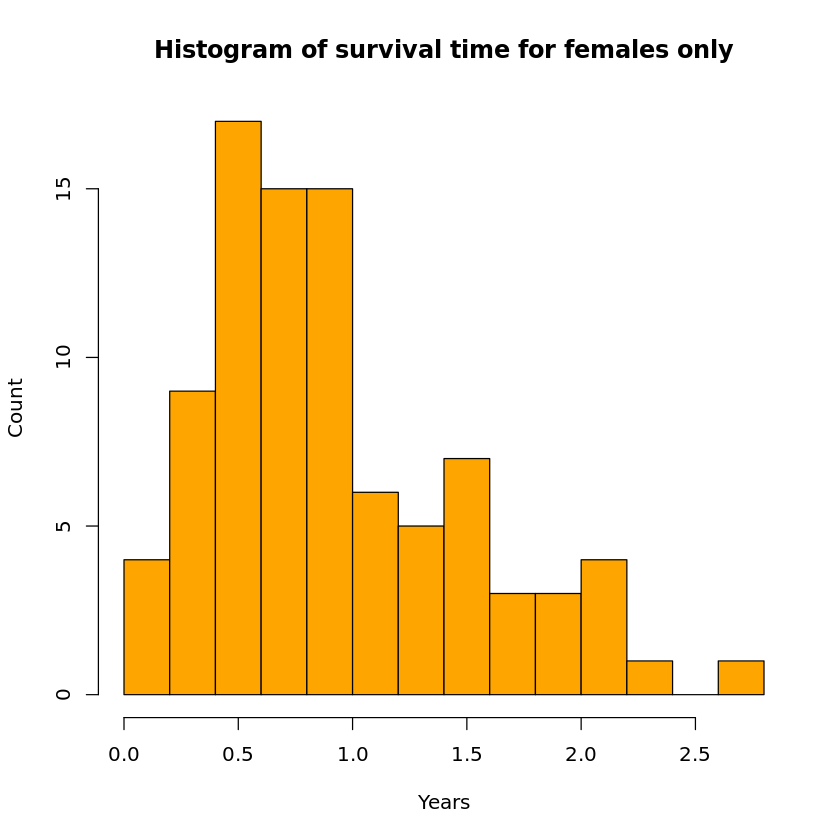

In [26]:
# plot a histogram for survival only female patients
hist(lung[lung$sex.category == "Female",]$time/365, breaks=10, col="orange", xlab="Years", ylab="Count", 
     main="Histogram of survival time for females only")

# retrieve data for female patients who survived more than 2.5 years
lung[lung$sex.category == "Female"& lung$time/365 > 2.5,]


# Outlier detection

[1] 1010  883 1022  814  965  765  821  840  791  806

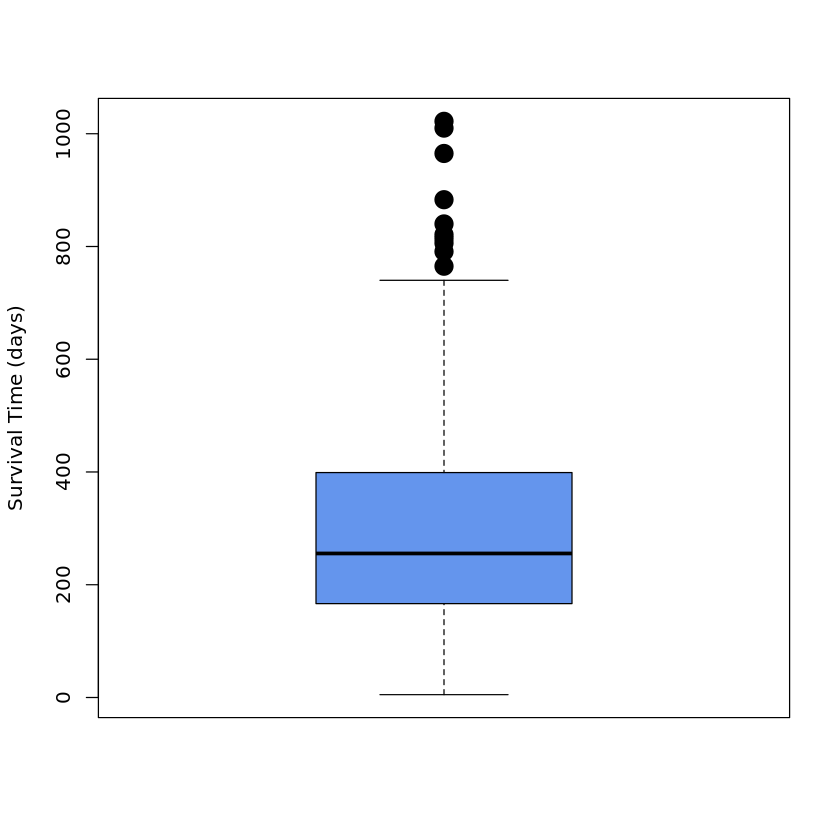

In [27]:
boxplot(lung$time, col="cornflowerblue", pch=19, cex=2,      
        ylab="Survival Time (days)")
Tmp <- boxplot.stats(lung$time) # retrieve stats from the boxplot
# list the outlier values from time
lung$time[lung$time %in% boxplot.stats(lung$time)$out]

# remove the outliers from data set lung
# Lung <- lung[! lung$time %in% boxplot.stats(lung$time)$out,]
#
# The above was commented out so nothing is removed formt ehd ataset for the purpose of this code to work.

# Multivariate visualization: grouping

In [28]:
# build the groups for every year of survival for either males or females
#
# males that survived  no more than 1 year
mg1 <- lung[lung$sex.category == "Male" & lung$time/365 <= 1,]

# males that survived more than 1 year but no more than 2 years
mg2 <- lung[lung$sex.category == "Male" & lung$time/365 > 1 & lung$time/365 <= 2,]

# males that survived more than 2 years but no more than 3 years
mg3 <- lung[lung$sex.category == "Male" & lung$time/365 > 2 & lung$time/365 <= 3,]


# females that survived no more than 1 year
fg1 <- lung[lung$sex.category == "Female" & lung$time/365 <= 1,]

# females that survived more than 1 year but no more than 2 years
fg2 <- lung[lung$sex.category == "Female" & lung$time/365 > 1 & lung$time/365 <= 2,]

# females that survived more than 2 years but no more than 3 years
fg3 <- lung[lung$sex.category == "Female" & lung$time/365 > 2 & lung$time/365 <= 3,]


# Multivariate visualization: scatter plot of age vs. survival for the groups

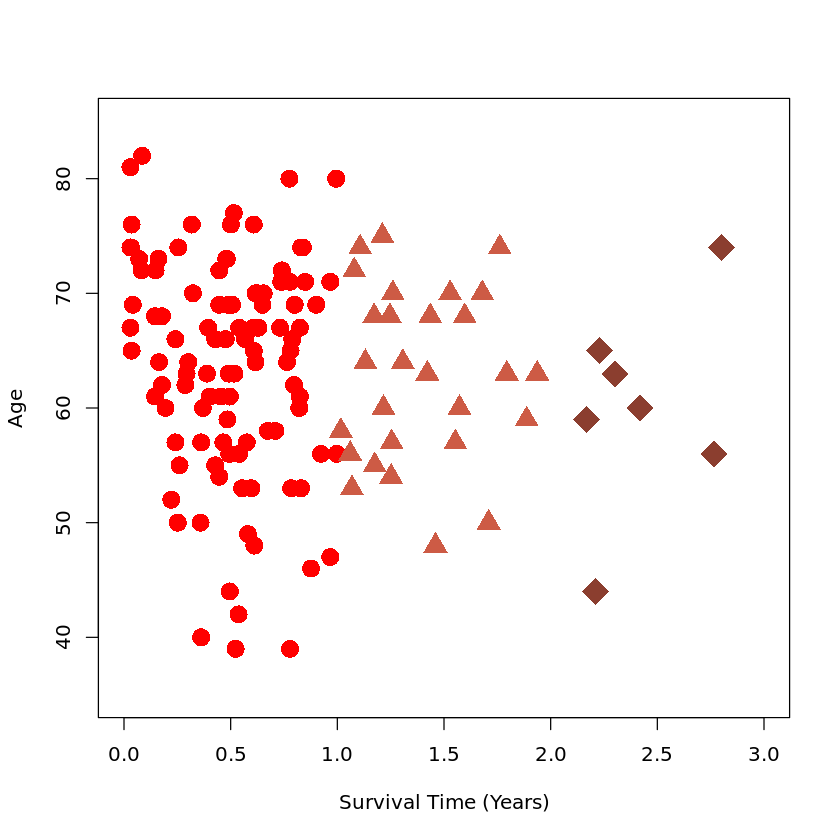

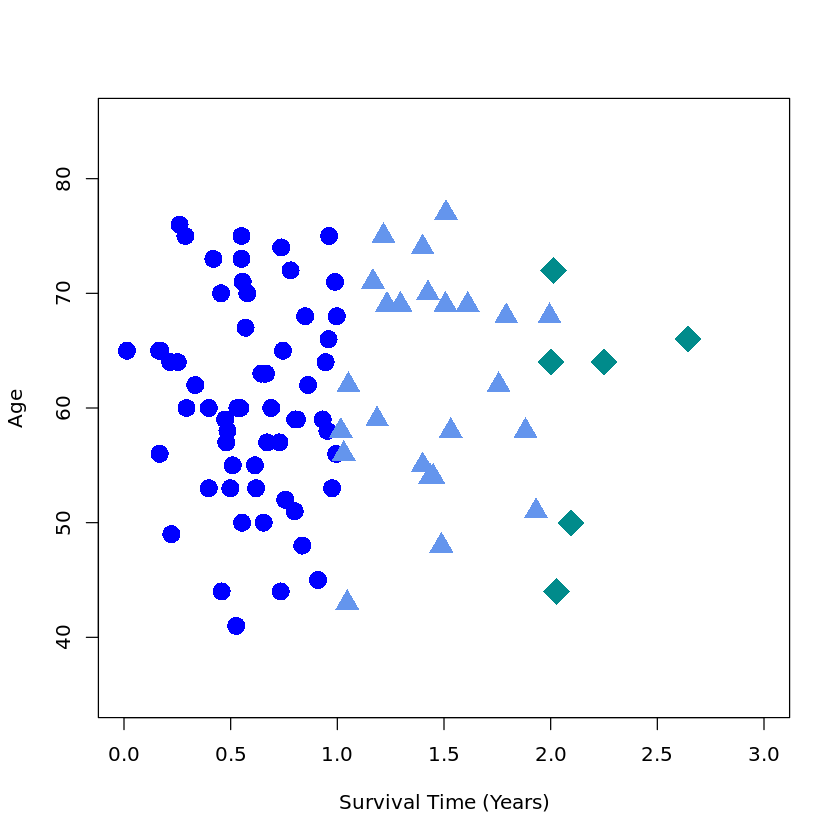

In [29]:
# scatter plot of age vs. survival for the groups 
plot(mg1$time/365, mg1$age, xlim=c(0,3), ylim=c(35,85), pch=16, 
   col = "red", cex=2, xlab="Survival Time (Years)", ylab="Age")
points(mg2$time/365, mg2$age, pch=17, col = "coral3", cex=2)
points(mg3$time/365, mg3$age, pch=18, col = "coral4", cex=3)

plot(fg1$time/365, fg1$age, xlim=c(0,3), ylim=c(35,85), pch=16, 
   col = "blue", cex=2, xlab="Survival Time (Years)", ylab="Age")
points(fg2$time/365, fg2$age, pch=17, col = "cornflowerblue", cex=2)
points(fg3$time/365, fg3$age, pch=18, col = "cyan4", cex=3)

# Multivariate visualization: scatter plot of age vs. survival for the groups
## together

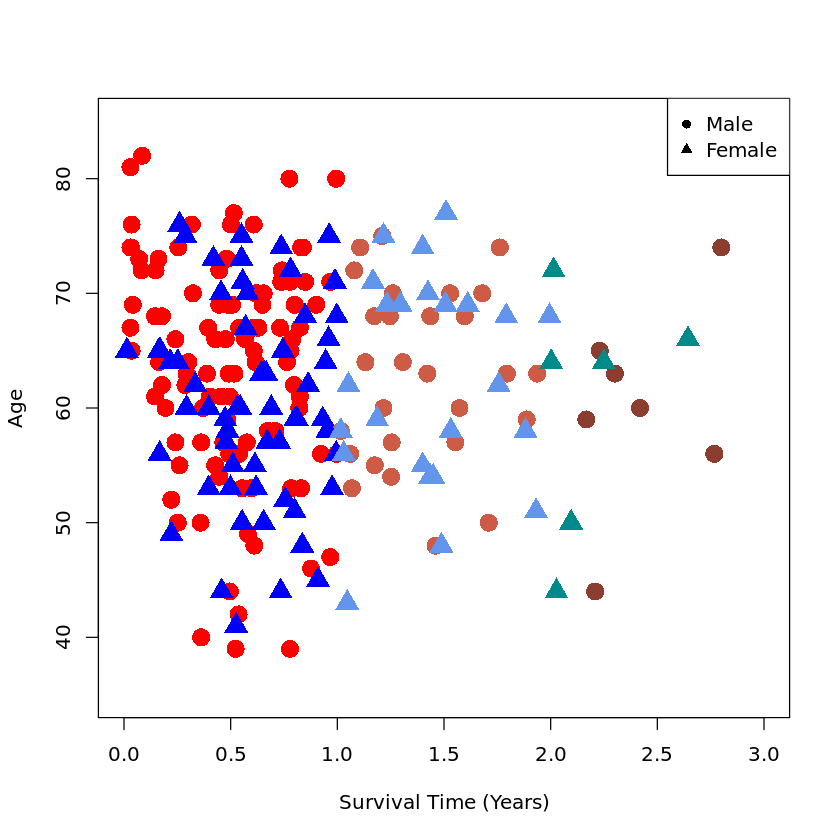

In [30]:
# first group plot
plot(mg1$time/365, mg1$age, xlim=c(0,3), ylim=c(35,85), pch=16, 
col = "red", cex=2, xlab="Survival Time (Years)", ylab="Age")

# subsequent additions to the plot
points(mg2$time/365, mg2$age, pch=16, col = "coral3", cex=2)
points(mg3$time/365, mg3$age, pch=16, col = "coral4", cex=2)
points(fg1$time/365, fg1$age, pch=17, col = "blue", cex=2)
points(fg2$time/365, fg2$age, pch=17, col = "cornflowerblue", cex=2)
points(fg3$time/365, fg3$age, pch=17, col = "cyan4", cex=2)
legend("topright", c("Male", "Female"), pch=c(16,17), cex=1)

# Multivariate visualization: grouping
## The easy way!

In [31]:
# build the groups for every year of survival for either males or females
# by adding a new column into lung and creating new group labels
lung$new <- NA; # new column filled with NAs

# males that survived  no more than 1 year
lung[lung$sex.category=="Male" & lung$time/365<=1,]$new <- "Group_m1"
# males that survived more than 1 year but no more than 2 years
lung[lung$sex.category=="Male" & lung$time/365>1 & lung$time/365<=2,]$new <- "Group_m2"
# males that survived more than 2 years but no more than 3 years
lung[lung$sex.category=="Male" & lung$time/365>2 & lung$time/365<=3,]$new <- "Group_m3"

# females that survived no more than 1 year
lung[lung$sex.category=="Female" & lung$time/365<=1,]$new <- "Group_f1"
# females that survived more than 1 year but no more than 2 years
lung[lung$sex.category=="Female" & lung$time/365>1 & lung$time/365<=2,]$new <- "Group_f2"
# females that survived more than 2 years but no more than 3 years
lung[lung$sex.category=="Female" & lung$time/365>2 & lung$time/365<=3,]$new <- "Group_f3"


In [32]:
head(lung)


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status.category,sex.category,new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,3,306,2,74,1,1,90,100,1175,NA,dead,Male,Group_m1
2,3,455,2,68,1,0,90,90,1225,15,dead,Male,Group_m2
3,3,1010,1,56,1,0,90,90,NA,15,censored,Male,Group_m3
4,5,210,2,57,1,1,90,60,1150,11,dead,Male,Group_m1
5,1,883,2,60,1,0,100,90,NA,0,dead,Male,Group_m3
6,12,1022,1,74,1,1,50,80,513,0,censored,Male,Group_m3


# Multivariate visualization: scatter plot of age vs. survival for the groups
## together (easy)

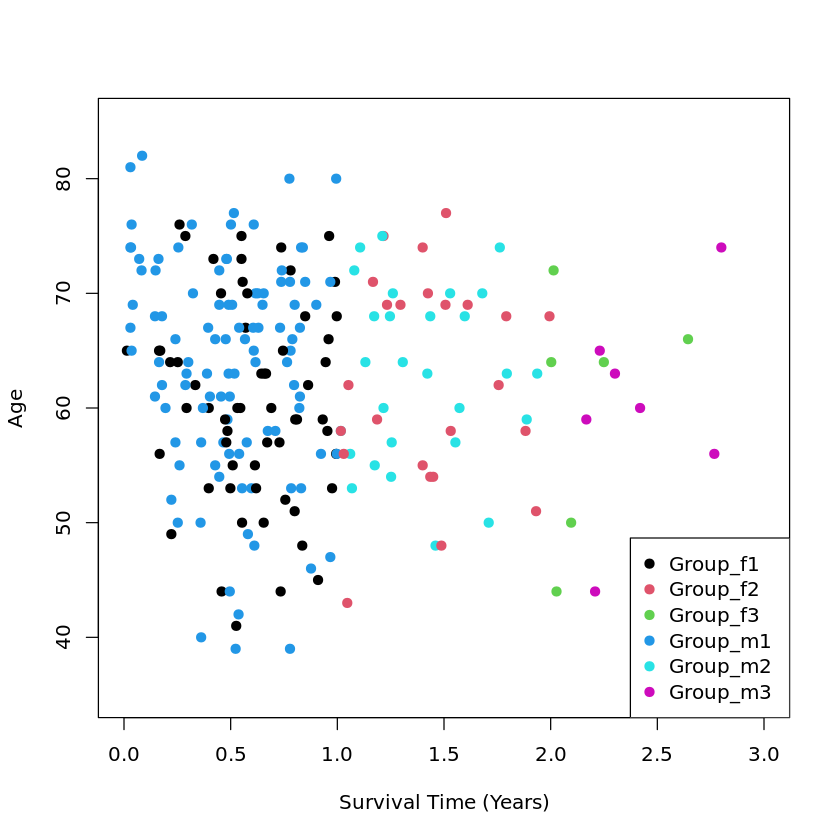

In [33]:
plot(lung$time/365, lung$age, pch=19, col=factor(lung$new),    
     xlim=c(0,3), ylim=c(35,85), xlab="Survival Time (Years)", ylab="Age")


legend("bottomright", legend = levels(factor(lung$new)), pch = 19, 
        col = factor(levels(factor(lung$new))))


# Tabulation: frequencies

In [34]:
table(lung$sex)


  1   2 
138  90 

In [35]:
table(lung$sex.category)


Female   Male 
    90    138 

In [36]:
table(lung$status.category) 


censored     dead 
      63      165 

# Tabulation: contingency tables 
## (2-way)

In [37]:
mytable <- table(lung$status.category,lung$sex.category) 
mytable

          
           Female Male
  censored     37   26
  dead         53  112

In [38]:
margin.table(mytable, 1) 


censored     dead 
      63      165 

In [39]:
prop.table(mytable)

          
              Female      Male
  censored 0.1622807 0.1140351
  dead     0.2324561 0.4912281

In [40]:
prop.table(mytable, 1) 

          
              Female      Male
  censored 0.5873016 0.4126984
  dead     0.3212121 0.6787879

In [41]:
prop.table(mytable, 2) 

          
              Female      Male
  censored 0.4111111 0.1884058
  dead     0.5888889 0.8115942

# Tabulation: contingency tables 
## (3-way)

In [42]:
mytable1 <- table(lung$status.category,lung$sex.category,lung$new)
ftable(mytable1)

                 Group_f1 Group_f2 Group_f3 Group_m1 Group_m2 Group_m3
                                                                      
censored Female        24       10        3        0        0        0
         Male           0        0        0       18        4        4
dead     Female        36       14        3        0        0        0
         Male           0        0        0       85       24        3

# Independence test: Chi-square test

In [43]:
mytable <- table(lung$status.category,lung$sex.category) # 2-way 
mytable

          
           Female Male
  censored     37   26
  dead         53  112

In [44]:
mytable <- table(lung$status.category,lung$sex.category) 
summary(mytable)

Number of cases in table: 228 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 13.511, df = 1, p-value = 0.0002371

In [45]:
mytable1 <- table(lung$status.category,lung$sex.category,lung$new)
ftable(mytable1)

                 Group_f1 Group_f2 Group_f3 Group_m1 Group_m2 Group_m3
                                                                      
censored Female        24       10        3        0        0        0
         Male           0        0        0       18        4        4
dead     Female        36       14        3        0        0        0
         Male           0        0        0       85       24        3

In [46]:
summary(mytable) 

Number of cases in table: 228 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 13.511, df = 1, p-value = 0.0002371

# Independence test: Fisher's exact test

In [47]:
mytable <- table(lung$status.category,lung$sex.category) # 2-way 
mytable

          
           Female Male
  censored     37   26
  dead         53  112

In [48]:
fisher.test(mytable) 


	Fisher's Exact Test for Count Data

data:  mytable
p-value = 0.0004349
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.583762 5.727861
sample estimates:
odds ratio 
  2.991585 
